In [14]:
#importing relavent libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  Part 1 - understanding and cleaning the data

## Explanation for all columns

**age**  -     The age of the insured client

**sex**   -    The Gender of the insured client

**BMI**   - Body Mass Index ,  is a value derived from the mass (weight) and height of a person. This value influences the                 health of a given person. Generally a good bmi is between 18.5 to 25

**children**        -  Number of children covered by health insurance / Number of dependents.

**smoker**             - Whether the insured customer has smokes or not.

**region**     -   The beneficiary's residential area in the US -  northeast, southeast, southwest and northwest.

**charges**     -  The amount paid periodically to the insurer by the insured client.



#### Lets start examining the data

In [16]:
df.shape
#1338 rows , 7 columns 

(1338, 7)

In [17]:
df.isnull().sum()
#Great! no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

3 non numerical values , 2 of them are easy to deal with since they are yes or no values. The region is a bit trickier so using the value_counts method lets see exactly what we are dealing with

In [19]:
df["region"].value_counts()
#Good! only 4 regions, we will soon change them to numerical values

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [20]:
df.describe()
#Wanting to get an idea of what is a regular price for the health insurence, and other information, df.describe() is very helpful

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Are data is pretty clean , and we now have a good understanding of it. Therefore we can move on to visualizing.

##  Part 2 -  Visualization

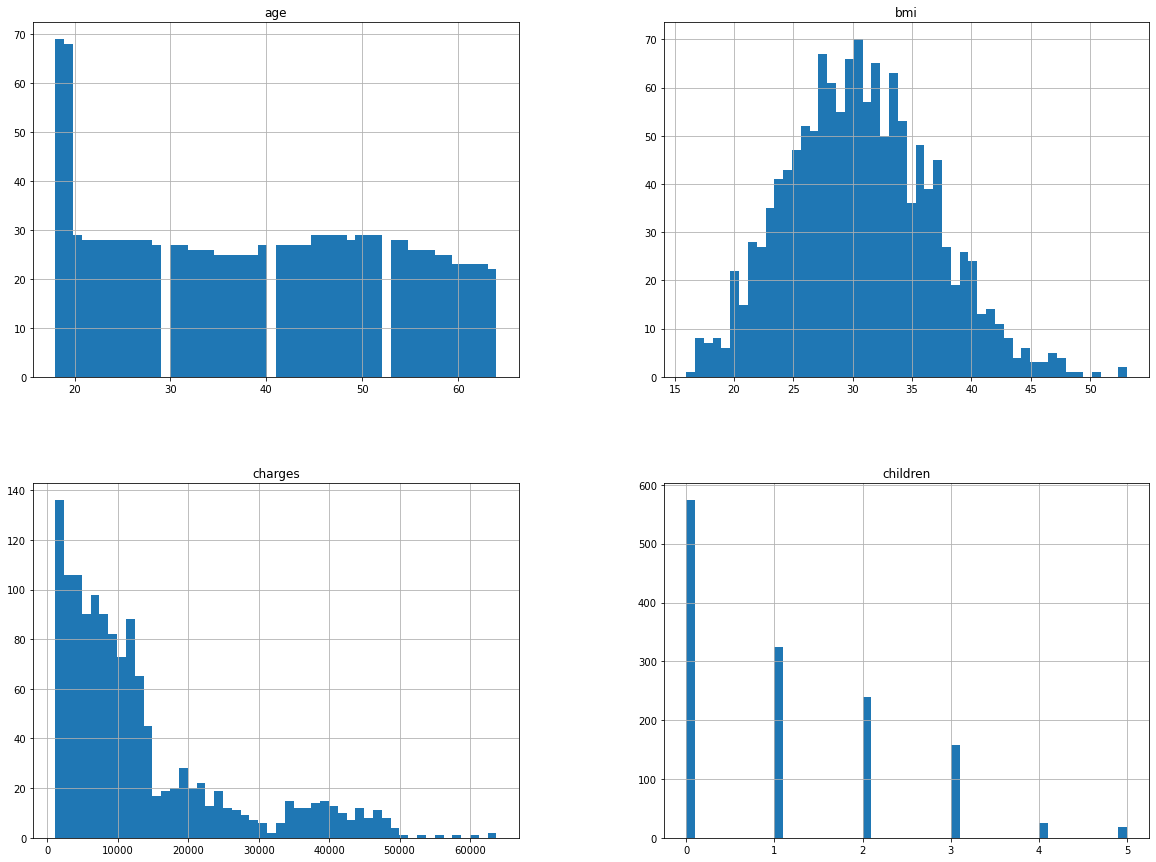

In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

* Besides bmi are histograms are head heavy , meaning they extend much farther to the left then to the right.. In other word are  in the numerical columns there is more smaller attributes rather then large ones.
* The bmi histiogram is more centerd and balanced , meaning most insured clients's bmi is around 30-35

In order to continue vizualizing all of my data set properly and start finding correlations, i will use the LabelEncoder function to change all my data to numerical. The function will chage smoker and sex to 0 or 1 (female = 0 , male = 1) , and change the regions to 0,1,2,3.

In [22]:
from sklearn.preprocessing import LabelEncoder
labelE = LabelEncoder()
df['sex'] = labelE.fit_transform(df['sex'])
df['smoker'] = labelE.fit_transform(df['smoker'])
df['region'] = labelE.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [26]:
#now that my data is all numerical i can run a corelation map to unterstand better which value has strong corelation to charges.
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

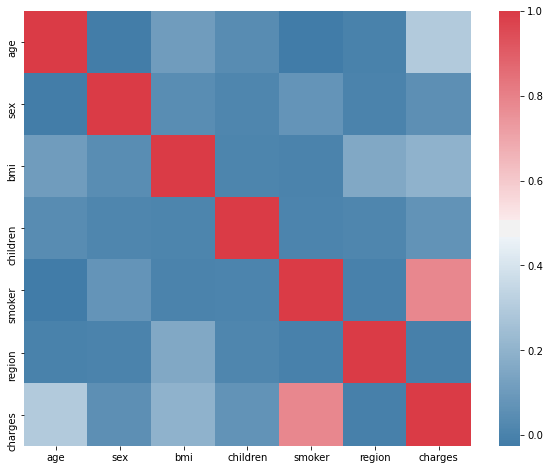

In [35]:
#lets see that in a heat map
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(df.corr() , cmap=sns.diverging_palette(240,10,as_cmap=True) ,ax=ax)

In [31]:
#write obseravations for heat map and investigate smoking and bmi ( maybe age)
#next step is to determine how many corraltion maps to use. should i use seaborn?